# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [21]:
df.drop('Id', axis=1).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [22]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
more_20 =  missing_value_df['percent_missing']>20
missing_value_df = missing_value_df[more_20]
missing_value_df

,column_name,percent_missing
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [23]:
df = df.drop([i for i in missing_value_df['column_name']], axis=1)

In [24]:
df.shape

(1460, 76)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

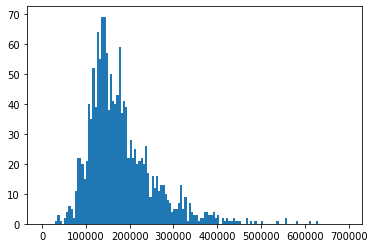

In [31]:
# your code here
plt.hist(df['SalePrice'], bins=range(0,700000,5000))
plt.show()

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [36]:
#df.apply(np.log) 
# I don't know why this isn't working 

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [43]:
df[['GrLivArea','LotArea','GarageArea','SalePrice']].corr()
# there are some interesting correlation figures for grlivearea and garagearea compared with saleprice. We can explore these.

,GrLivArea,LotArea,GarageArea,SalePrice
GrLivArea,1.000000,0.263116,0.468997,0.708624
LotArea,0.263116,1.000000,0.180403,0.263843
GarageArea,0.468997,0.180403,1.000000,0.623431
SalePrice,0.708624,0.263843,0.623431,1.000000


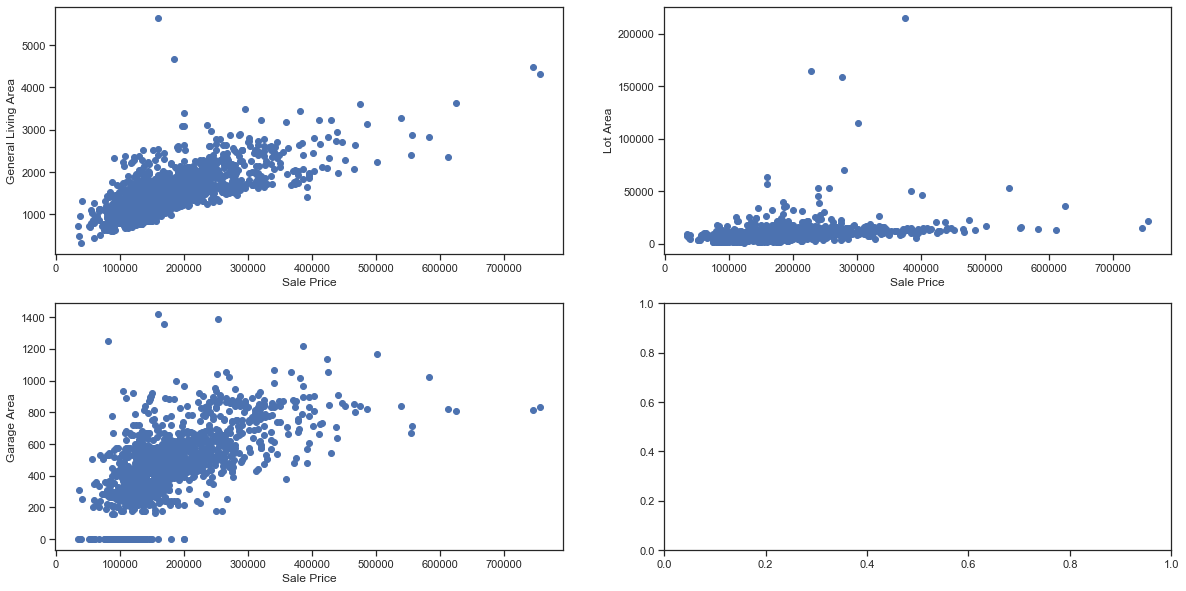

In [96]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(20, 10)) #first we assign width to figsize, then height. 
axs[0,0].scatter(df['SalePrice'],df['GrLivArea'])
axs[1,0].scatter(df['SalePrice'],df['GarageArea'])
axs[0,1].scatter(df['SalePrice'],df['LotArea'])
axs[0,0].set_xlabel('Sale Price')
axs[0,0].set_ylabel('General Living Area')
axs[1,0].set_xlabel('Sale Price')
axs[1,0].set_ylabel('Garage Area')
axs[0,1].set_xlabel('Sale Price')
axs[0,1].set_ylabel('Lot Area')
plt.show()
#as predicted, it seems there is a slight correlation between general living area, garage area, and saleprice. 
#however, outliers are causing us problems. 

In [73]:
mid_df = df[df['SalePrice'].between(df['SalePrice'].quantile(.05), df['SalePrice'].quantile(.95))]
mid_df = mid_df[df['GrLivArea'].between(df['GrLivArea'].quantile(.05), df['GrLivArea'].quantile(.95))]
mid_df = mid_df[df['GarageArea'].between(df['GarageArea'].quantile(.05), df['GarageArea'].quantile(.95))]
mid_df = mid_df[df['LotArea'].between(df['LotArea'].quantile(.05), df['LotArea'].quantile(.95))]

C:\Users\lukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\lukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


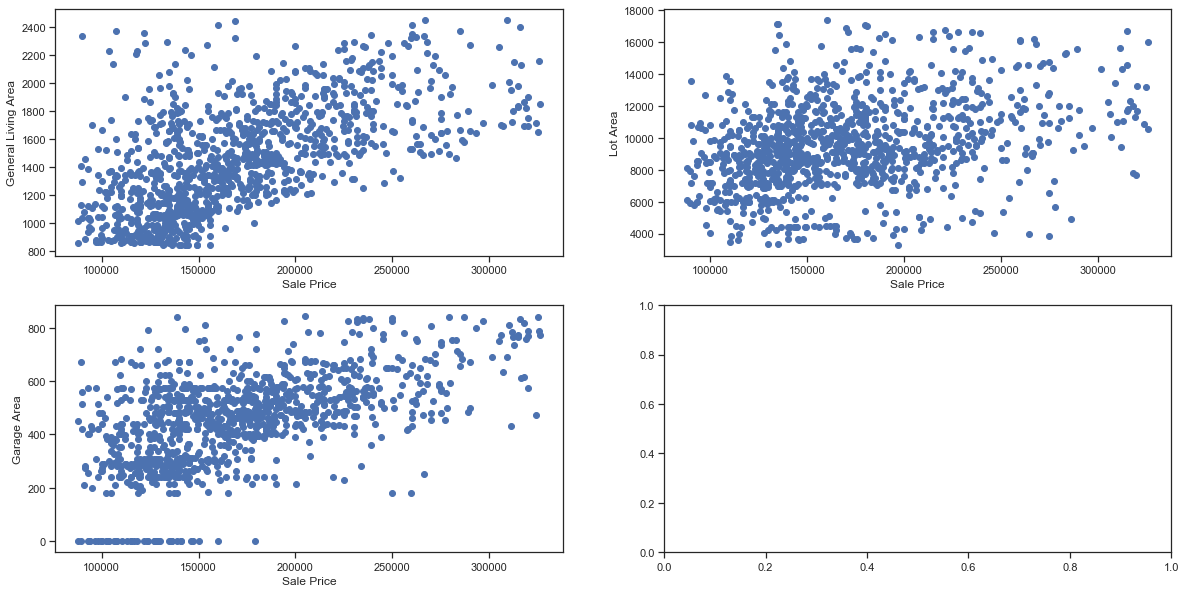

In [100]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(20, 10)) #first we assign width to figsize, then height. 
axs[0,0].scatter(mid_df['SalePrice'],mid_df['GrLivArea'])
axs[1,0].scatter(mid_df['SalePrice'],mid_df['GarageArea'])
axs[0,1].scatter(mid_df['SalePrice'],mid_df['LotArea'],)
axs[0,0].set_xlabel('Sale Price')
axs[0,0].set_ylabel('General Living Area')
axs[1,0].set_xlabel('Sale Price')
axs[1,0].set_ylabel('Garage Area')
axs[0,1].set_xlabel('Sale Price')
axs[0,1].set_ylabel('Lot Area')
plt.show()
# In removing the outliers, we get a better idea of correlation. The strongest trend seems to be for general living area

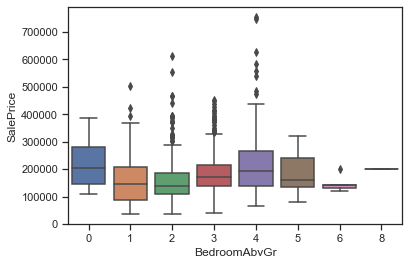

In [90]:
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df)

ValueError: List of violinplot statistics and `positions` values must have the same length

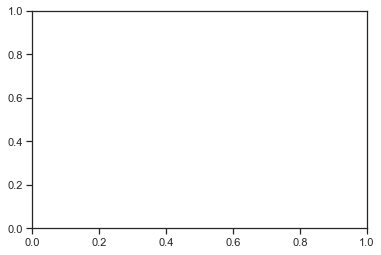

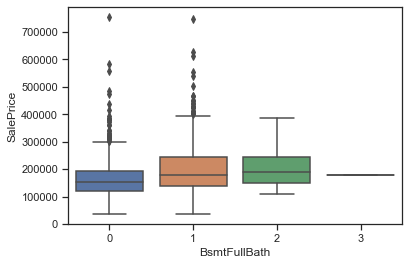

In [88]:
#sns.pairplot(df[["SalePrice","BedroomAbvGr", "KitchenAbvGr", "FullBath", "HalfBath", "BsmtFullBath","BsmtHalfBath"]])
#Number of rooms (BedroomAbvGr, KitchenAbvGr, FullBath, HalfBath, BsmtFullBath, BsmtHalfBath).

#How long the house has been built or remodeled (YearBuilt and YearRemodAdd).

#Neighborhood of the house (Neighborhood).
sns.boxplot(x="BsmtFullBath", y="SalePrice", data=df)

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

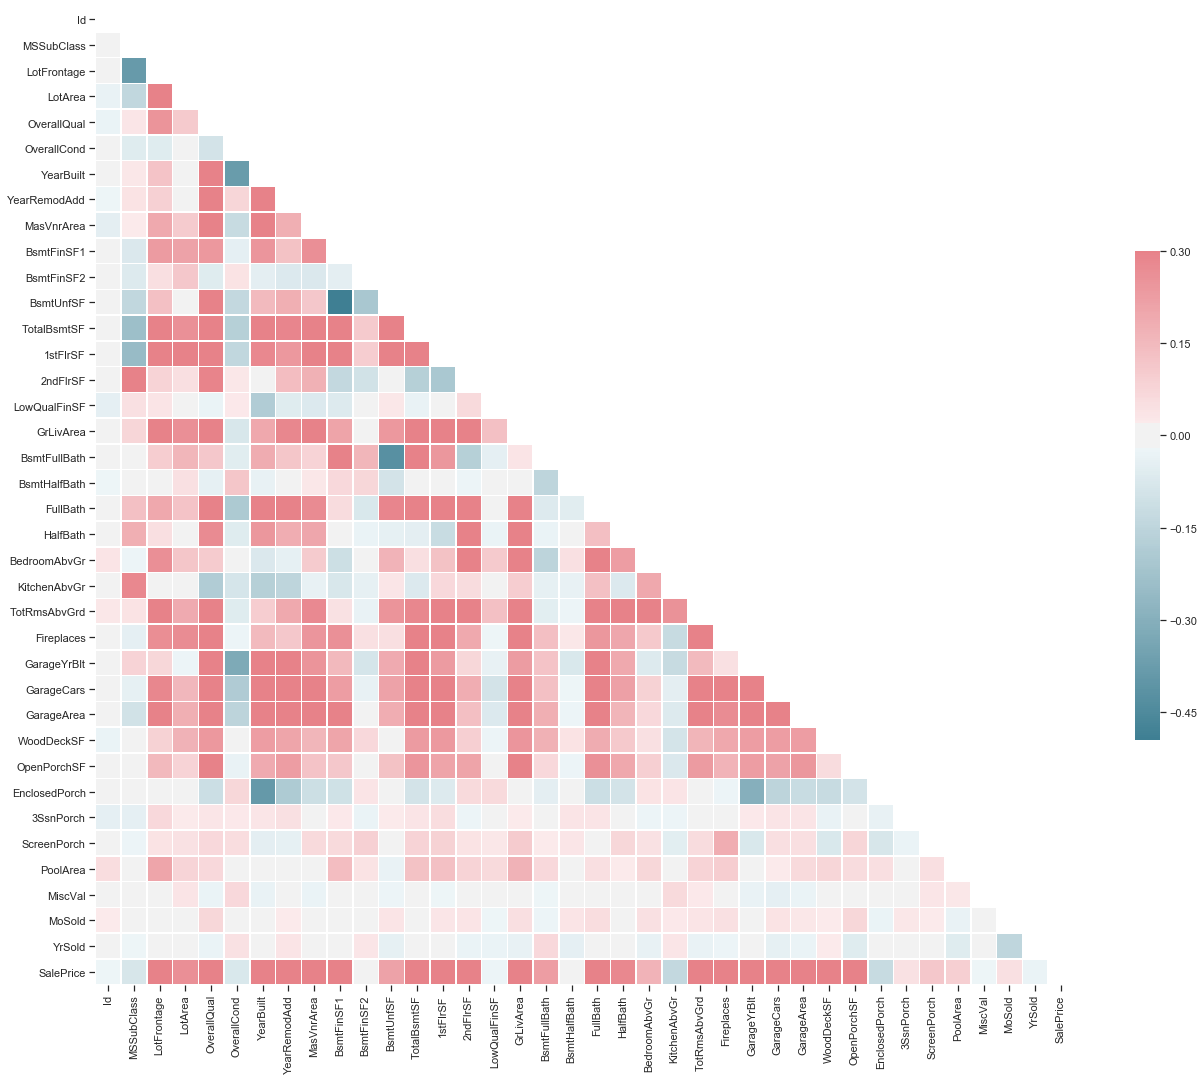

In [92]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [ ]:
# Lot Frontage, Overall Quality, Year Built, Year Remodelled, MasVnrArea, BuildUnfSNF, GrLivArea, and so on...
# I think what is interesting is that there is no one factor which we can claim increases sales price.
# Sales price is a multivariate determination, this intuitively feels right, we know that there are many things that 
# influence a buyers decision. 


## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

### General Living Areas vs Sale Price

General living area is one of the strongest indicators of the sale price of a property.

As general living area increases, the sale price of the property also increases. 

Whilst there are some properties with large living areas that plot quite poorly on sale price, there are no properties below 1600m2 that have a sale price higher than 300,000.

'Genereal living area of a property is one of the strongest indictators of the sale price of a house. \nAs  \n'

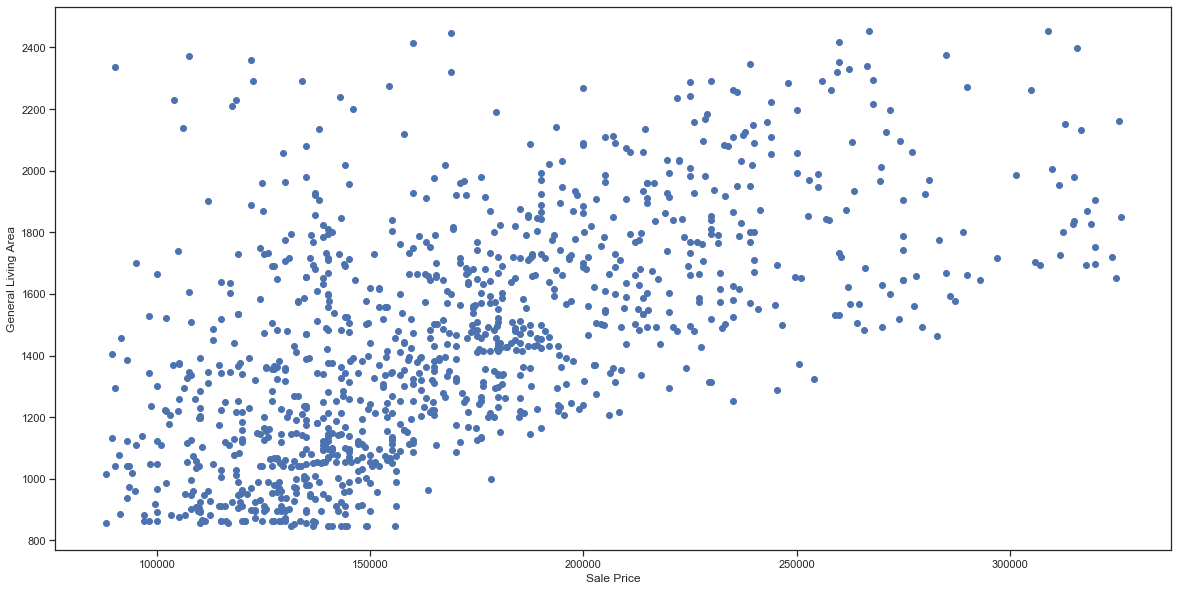

In [112]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
plt.scatter(mid_df['SalePrice'],mid_df['GrLivArea'])
axs.set_xlabel('Sale Price')
axs.set_ylabel('General Living Area')

### Garage Area vs Sale Price

Garage area is one of the strongest indicators of the sale price of a property.

As garage area increases, the sale price of the property also increases. 

Having a garage is a prerequisite for achieving a sale price of over ~180,000.

Text(0, 0.5, 'Garage Area')

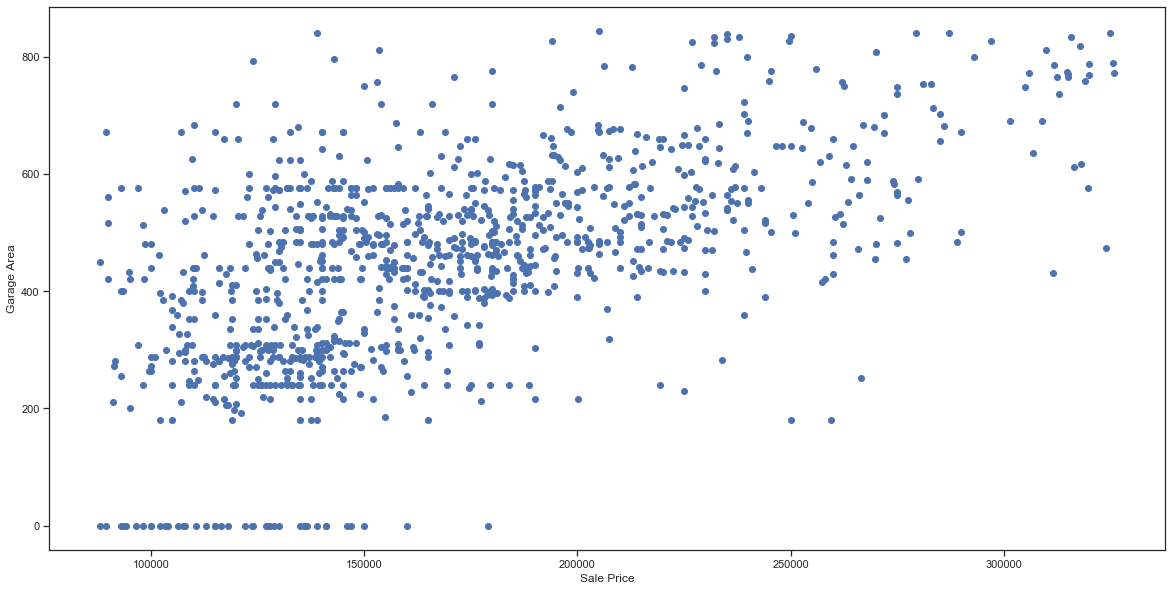

In [113]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
plt.scatter(mid_df['SalePrice'],mid_df['GarageArea'])
axs.set_xlabel('Sale Price')
axs.set_ylabel('Garage Area')

### Year Built/Year Remodelled vs Sale Price

We can see that sale price tends to increase the later a house is built. This is broken by two peaks around 1980 and 1935, which may indicate "period properties" that command a higher sale price. 

We can also see that year of remodelling closely follows the sale price line for year built, which suggests that 'newness' is a more important factor than architectural style i.e. how the building looks based on building practices at the time. 

Text(0, 0.5, 'Sale Price')

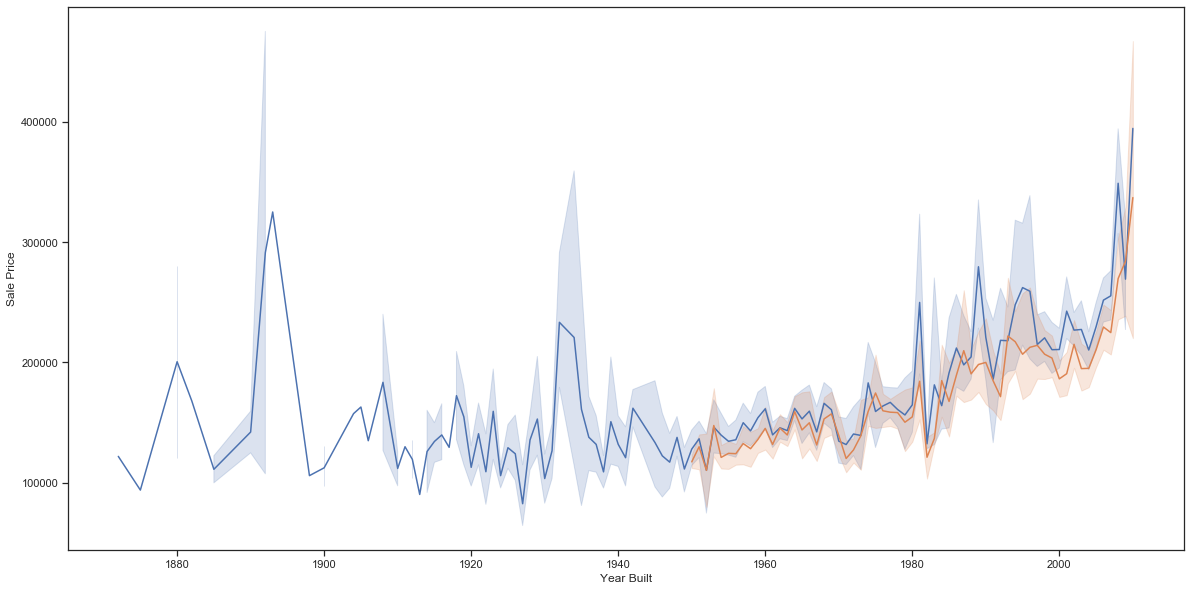

In [126]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
sns.lineplot(x="YearBuilt", y="SalePrice", data=df)
sns.lineplot(x="YearRemodAdd", y="SalePrice", data=df)
axs.set_xlabel('Year Built')
axs.set_ylabel('Sale Price')

### Bathrooms vs. Sale Price

The difference between none and one bathroom is minimal, but the mean sale price shifts considerably higher for properties with two bathrooms. Properties with three bathrooms have a broader range of sale price, but a much higher mean. 

Text(0, 0.5, 'Sale Price')

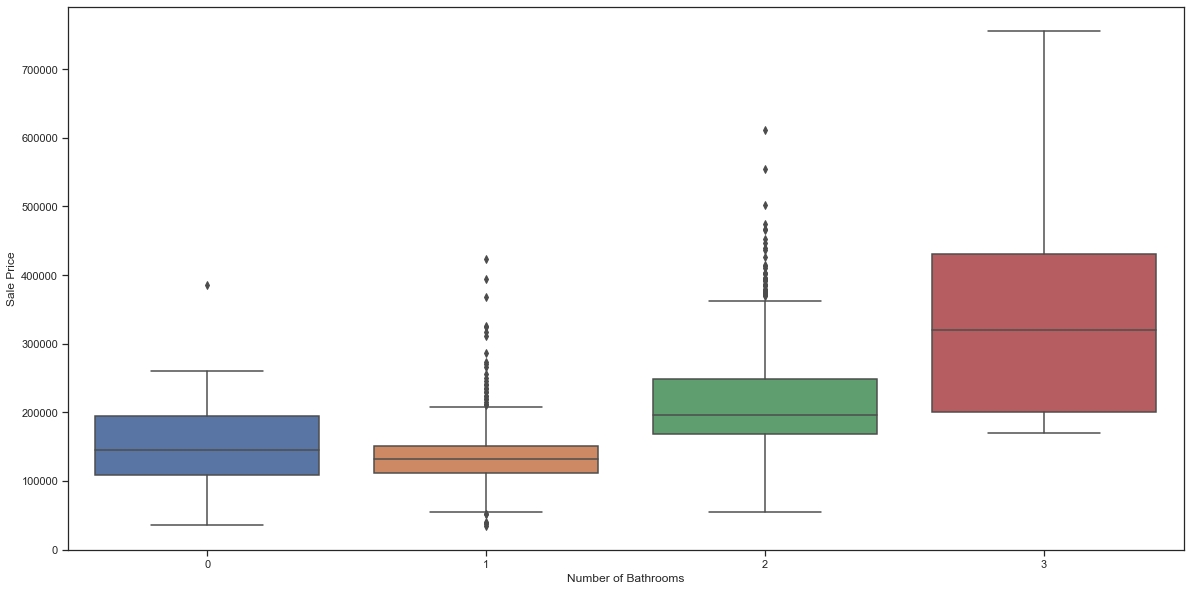

In [125]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
sns.boxplot(x="FullBath", y="SalePrice", data=df)
axs.set_xlabel('Number of Bathrooms')
axs.set_ylabel('Sale Price')

### Fireplaces vs Sale Price

Having no fireplace limits a property to a lower sale price. For properties with 0 fireplaces, the majority of properties record a sale price below ~180,000. 

In contrast, properties with 1 or 2 fireplaces have a higher average sale price, but the sale price range increases. We see the 1st and 4th quartile ranges increase, compared to properties with no fireplaces.

For properties with 3 fireplaces, the mean sale price remains similar the 1 and 2 fireplaces, but the 1st and 4th quartile ranges are more constricted. This might suggest that we can more accurately predict the price of a house with 3 fireplaces than those with less. 

Text(0, 0.5, 'Sale Price')

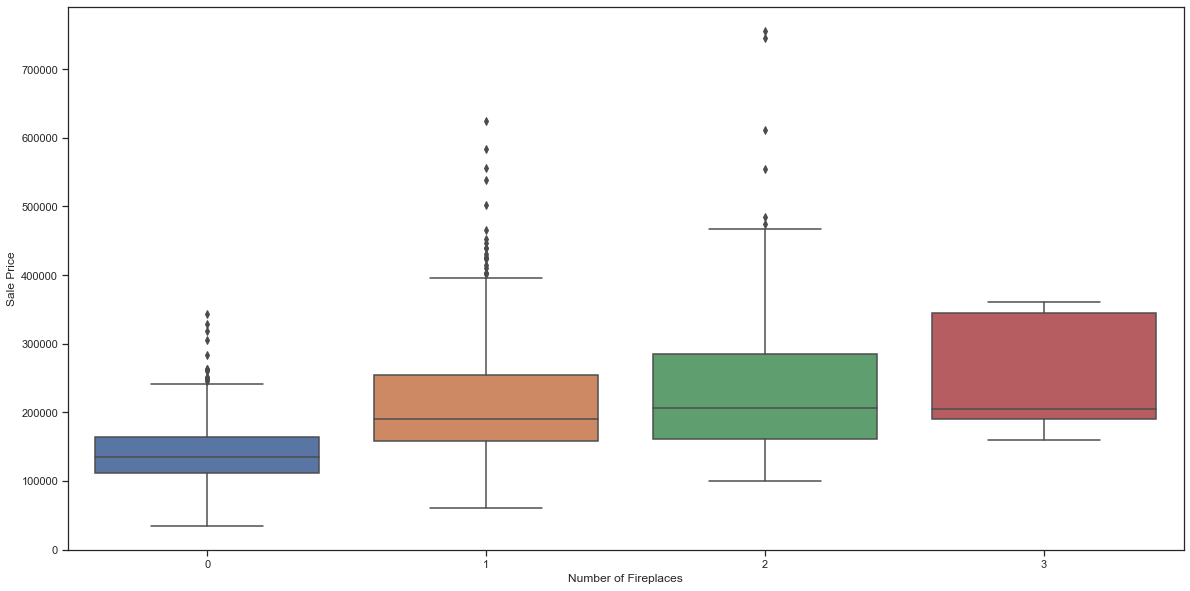

In [136]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
sns.boxplot(x="Fireplaces", y="SalePrice", data=df)
axs.set_xlabel('Number of Fireplaces')
axs.set_ylabel('Sale Price')